# **Hipótesis 3**:

### **"En un núcleo familiar compuesto por más miembros es más probable que se invierta en energía renovable"**

- Cuando un núcleo familiar se compone de más miembros, el consumo energético que producen es más elevado. Por lo tanto, invertir en dispositivos de energía renovable es una vía de ahorro en cuanto al precio pagado en las facturas.

- Por otro lado, no tener que depender de la red eléctrica ni de compañías energéticas, disminuye el riesgo de apagones y la incertidumbre en cuanto a gastos. 

- Todo esto hechos, unido a que por el Plan de Recuperación, Transformación y Resiliencia del Gobierno de España se ofrecen incentivos por la instalación de tecnologías renovables, pueden ser suficientes factores para sustentar que un núcleo familiar más grande pueda optar con más facilidad a dispositivos de energía renovable. No obstante, se tratará de validar esta hipótesis a continuación.

### **Preparación del entorno**

- Se importan los paquetes necesarios y la ruta de los datasets.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from sklearn import preprocessing 
import os 
import seaborn as sns
from sklearn import metrics
from scipy import stats

# PCA and normalization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# K-means clustering
from sklearn.cluster import KMeans

# path to data
GOLD_DATA_PATH = os.path.join("..", "..", "data/gold/")

- Se lee el csv con el dataset ya procesado de la ruta de datos gold.
    - Dentro de data_card_3_df.csv se encuentran los siguientes datos:
        - Provincias.
        - Índice de dispositivos de energía renovable en cada provincia.
        - Porcentaje de cada tipo de núcleo familiar en cada provincia.

In [2]:
h3_df = pd.read_csv(GOLD_DATA_PATH + "data_card_3_df.csv", sep = ";", encoding = "latin")
h3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Provincias                              47 non-null     object 
 1   Índice dispositivos energía renovable   47 non-null     float64
 2   Familia monoparental con 0 hijos        47 non-null     float64
 3   Familia monoparental con 1 hijo         47 non-null     float64
 4   Familia monoparental con 2 hijos o más  47 non-null     float64
 5   Pareja casada con 0 hijos               47 non-null     float64
 6   Pareja casada con 1 hijo                47 non-null     float64
 7   Pareja casada con 2 hijos o más         47 non-null     float64
 8   Pareja no casada con 0 hijos            47 non-null     float64
 9   Pareja no casada con 1 hijo             47 non-null     float64
 10  Pareja no casada con 2 hijos o más      47 non-null     float64


### **Explanatory Data Analysis**

In [3]:
# Visualizar datos
h3_df.head()

,Provincias,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más
0,Albacete,0.043141,0.033132,0.072565,0.044648,0.304961,0.176333,0.256043,0.051729,0.028501,0.032087
1,Alicante/Alacant,0.040361,0.041038,0.094143,0.045081,0.329020,0.160075,0.207443,0.065322,0.037659,0.020219
2,Almería,0.067138,0.030276,0.090071,0.042470,0.290029,0.161023,0.254404,0.059751,0.040286,0.031691
3,Araba/Álava,0.104454,0.033775,0.097398,0.045232,0.328722,0.157060,0.201585,0.072500,0.037726,0.026002
4,Asturias,0.050314,0.056932,0.115216,0.035539,0.365556,0.187972,0.132908,0.066571,0.023420,0.015886


- **Correlación entre variables**

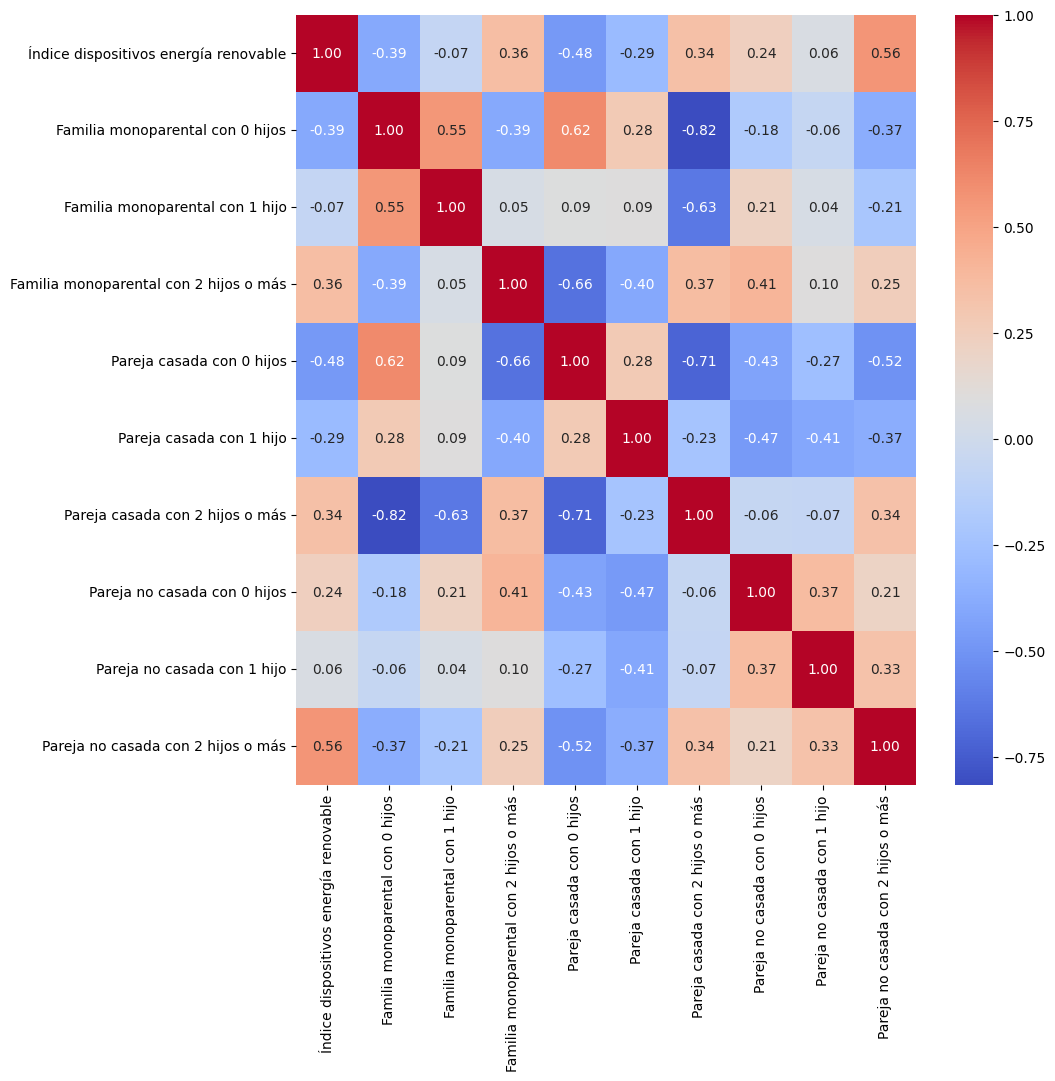

In [4]:
# Correlation matrix
corr = h3_df.iloc[:, 1:].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- Respecto a las correlaciones entre *Índice de dispositivos de energía renovable* y las variables de tipo de núcleo familiar, aunque no son muy fuertes, hay algunas a destacar.

    - Por un lado,hay correlación negativa con *Familia monoparental con 0 hijos* y con *Pareja casada con 0 hijos*. Aunque sean débiles (-0.39 y -0.48 respectivamente), da a entender que en una provincia habrá más dispositivos de energía renovable cuando haya menos núcleos familiares pequeños.

    - Por otro lado, hay correlación positiva con *Familia monoparental con 2 hijos o más*, *Pareja casada con 2 hijos o más* y con *Pareja no casada con 2 hijos o más*. De la misma manera, aunque sean correlaciones débiles, se entiende que al haber núcleos familiares de más componentes en una provincia, el índice de dispositivos de energía renovable es mayor.

- **Pairplot para visualizar la distribución de valores en variables.**

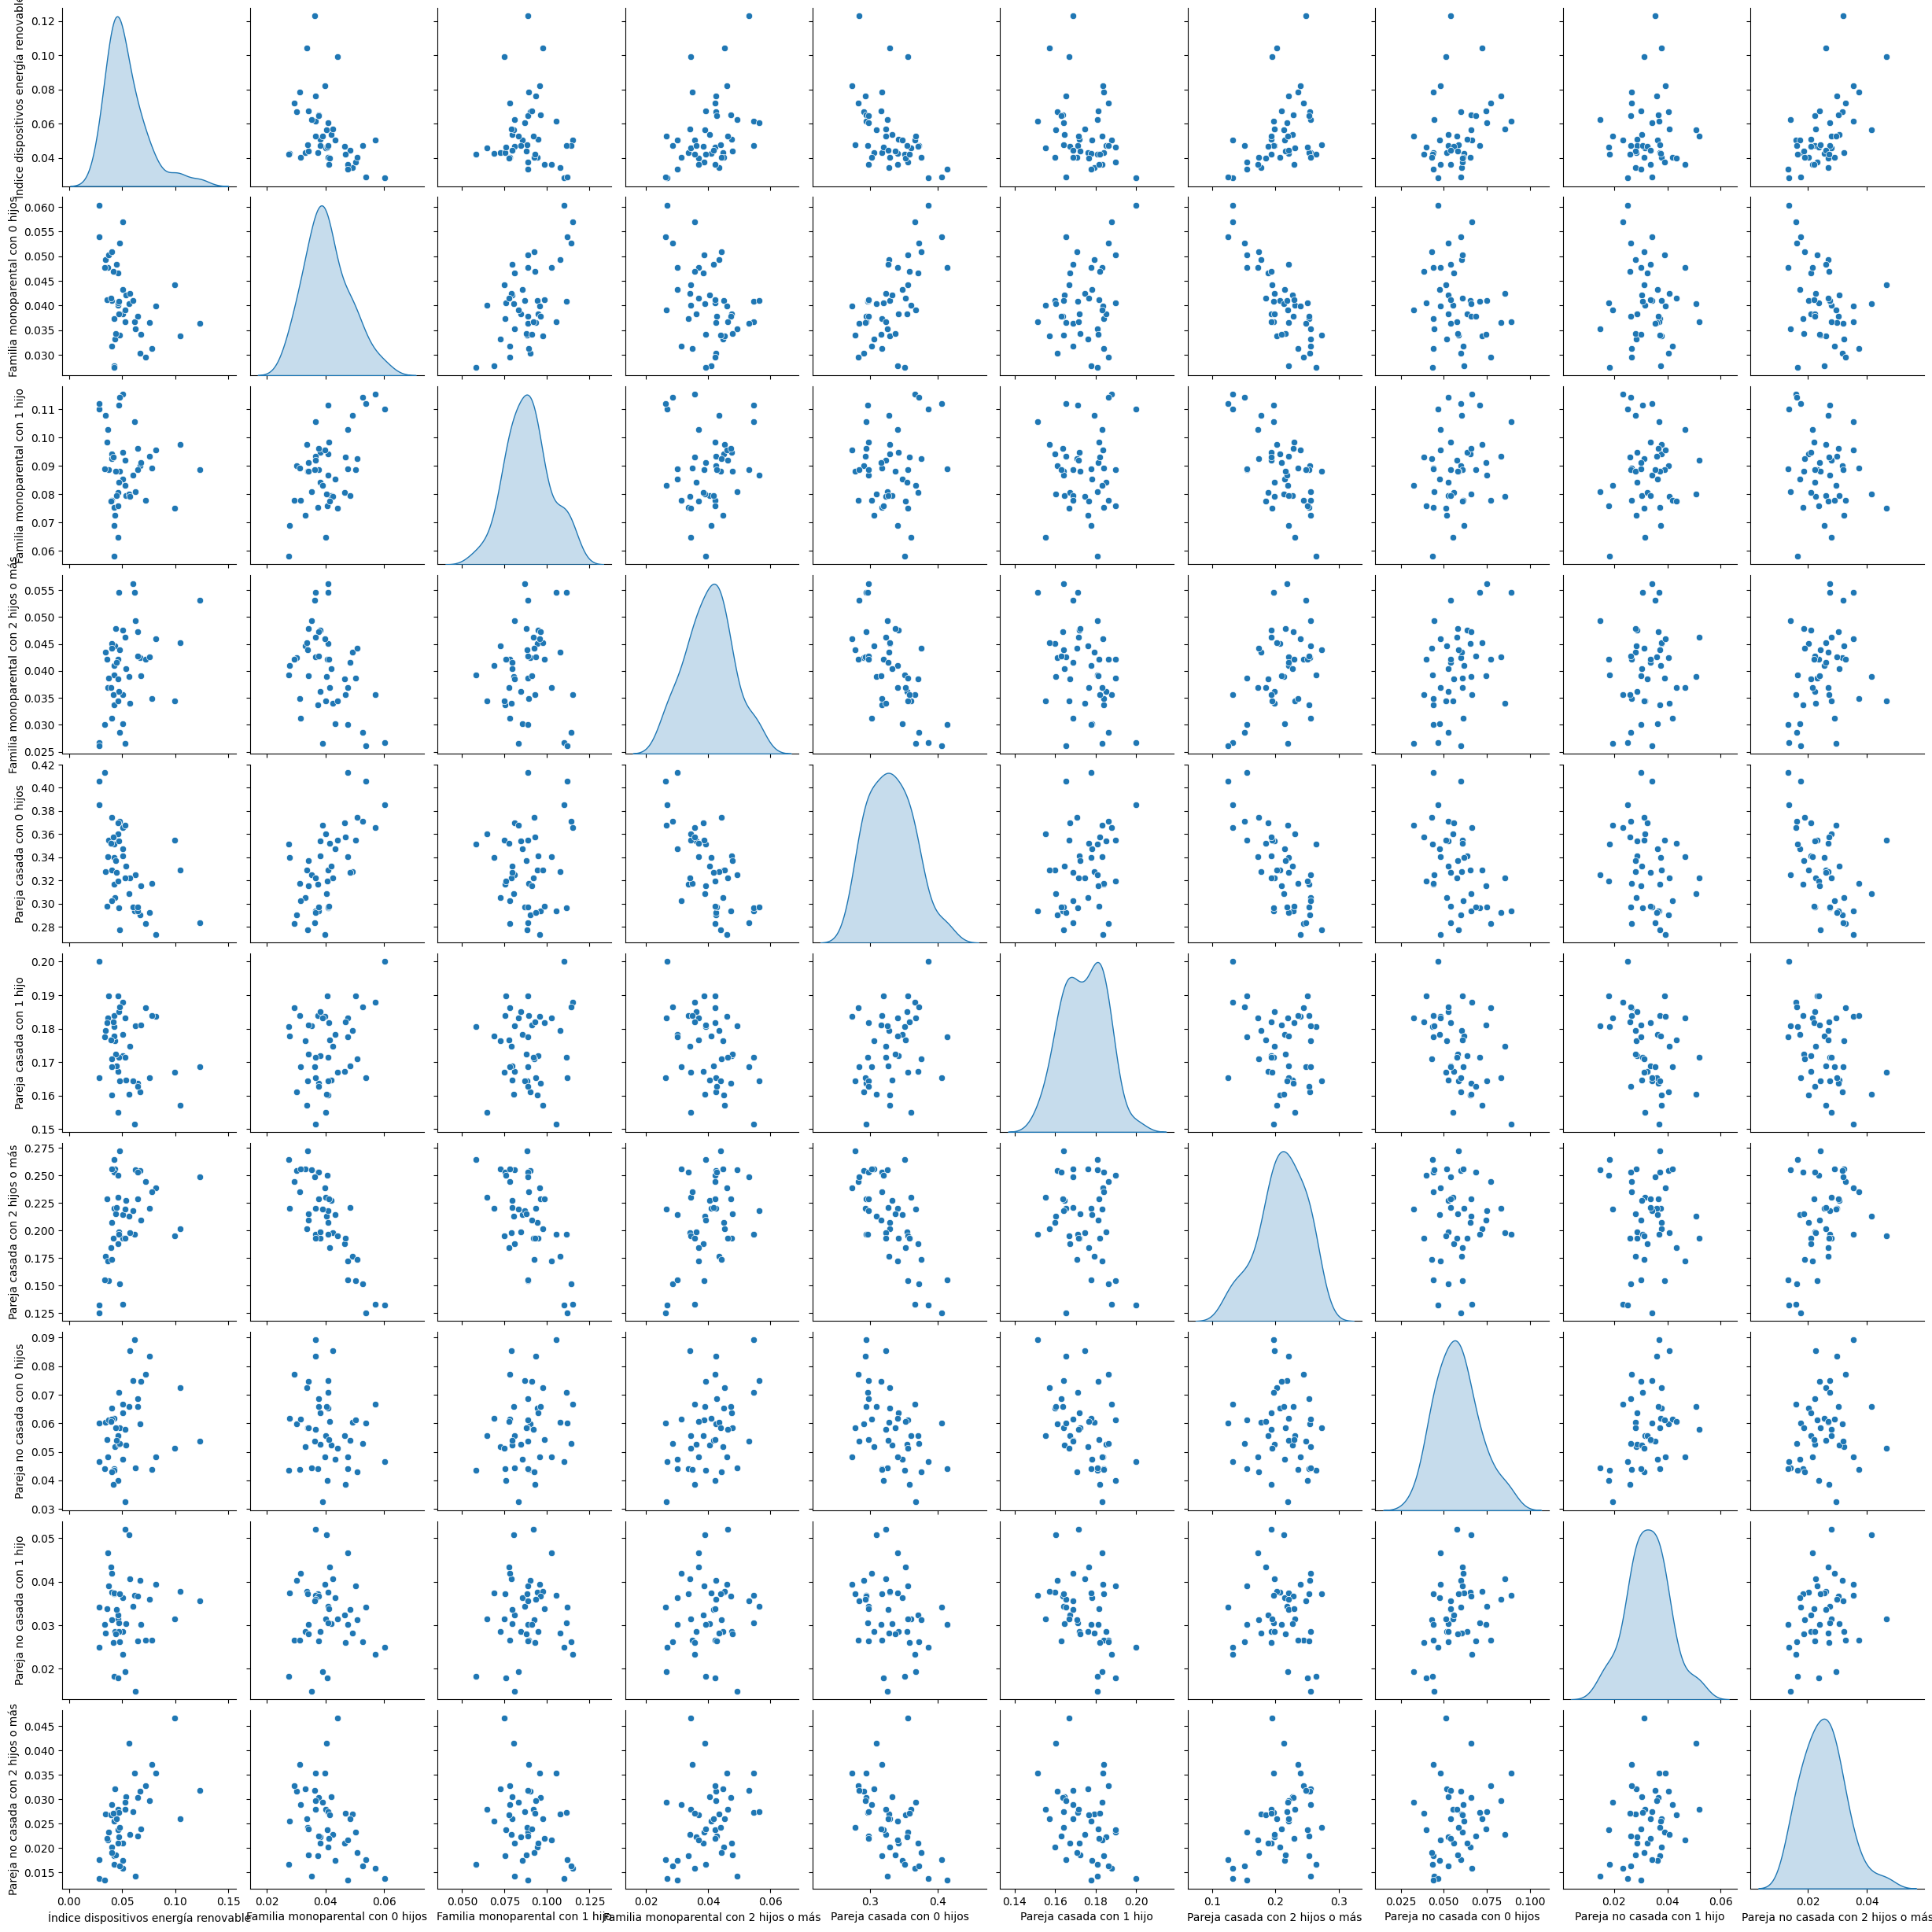

In [5]:
sns.pairplot(h3_df.iloc[:, 1:], diag_kind='kde')

- En el pairplot, se visualizan claramente las correlaciones entre las variables. 

    - Por ejemplo, *Familia monoparental con 0 hijos* y *Pareja casada con 2 hijo o más* tienen una fuerte correlación negativa (-0.82) lo que sugiere que si una provincia tiene una alta proporción de familias monoparentales con 0 hijos, tiene una proporción baja de parejas casadas con 2 hijos o más.

- Además, respecto a la distribución de variables, parece que la mayoría de variables siguen una distribución normal, no obstante, en algunos casos parece desviada (skewed). Por lo tanto, se visualizarán los QQ plots para asegurar.

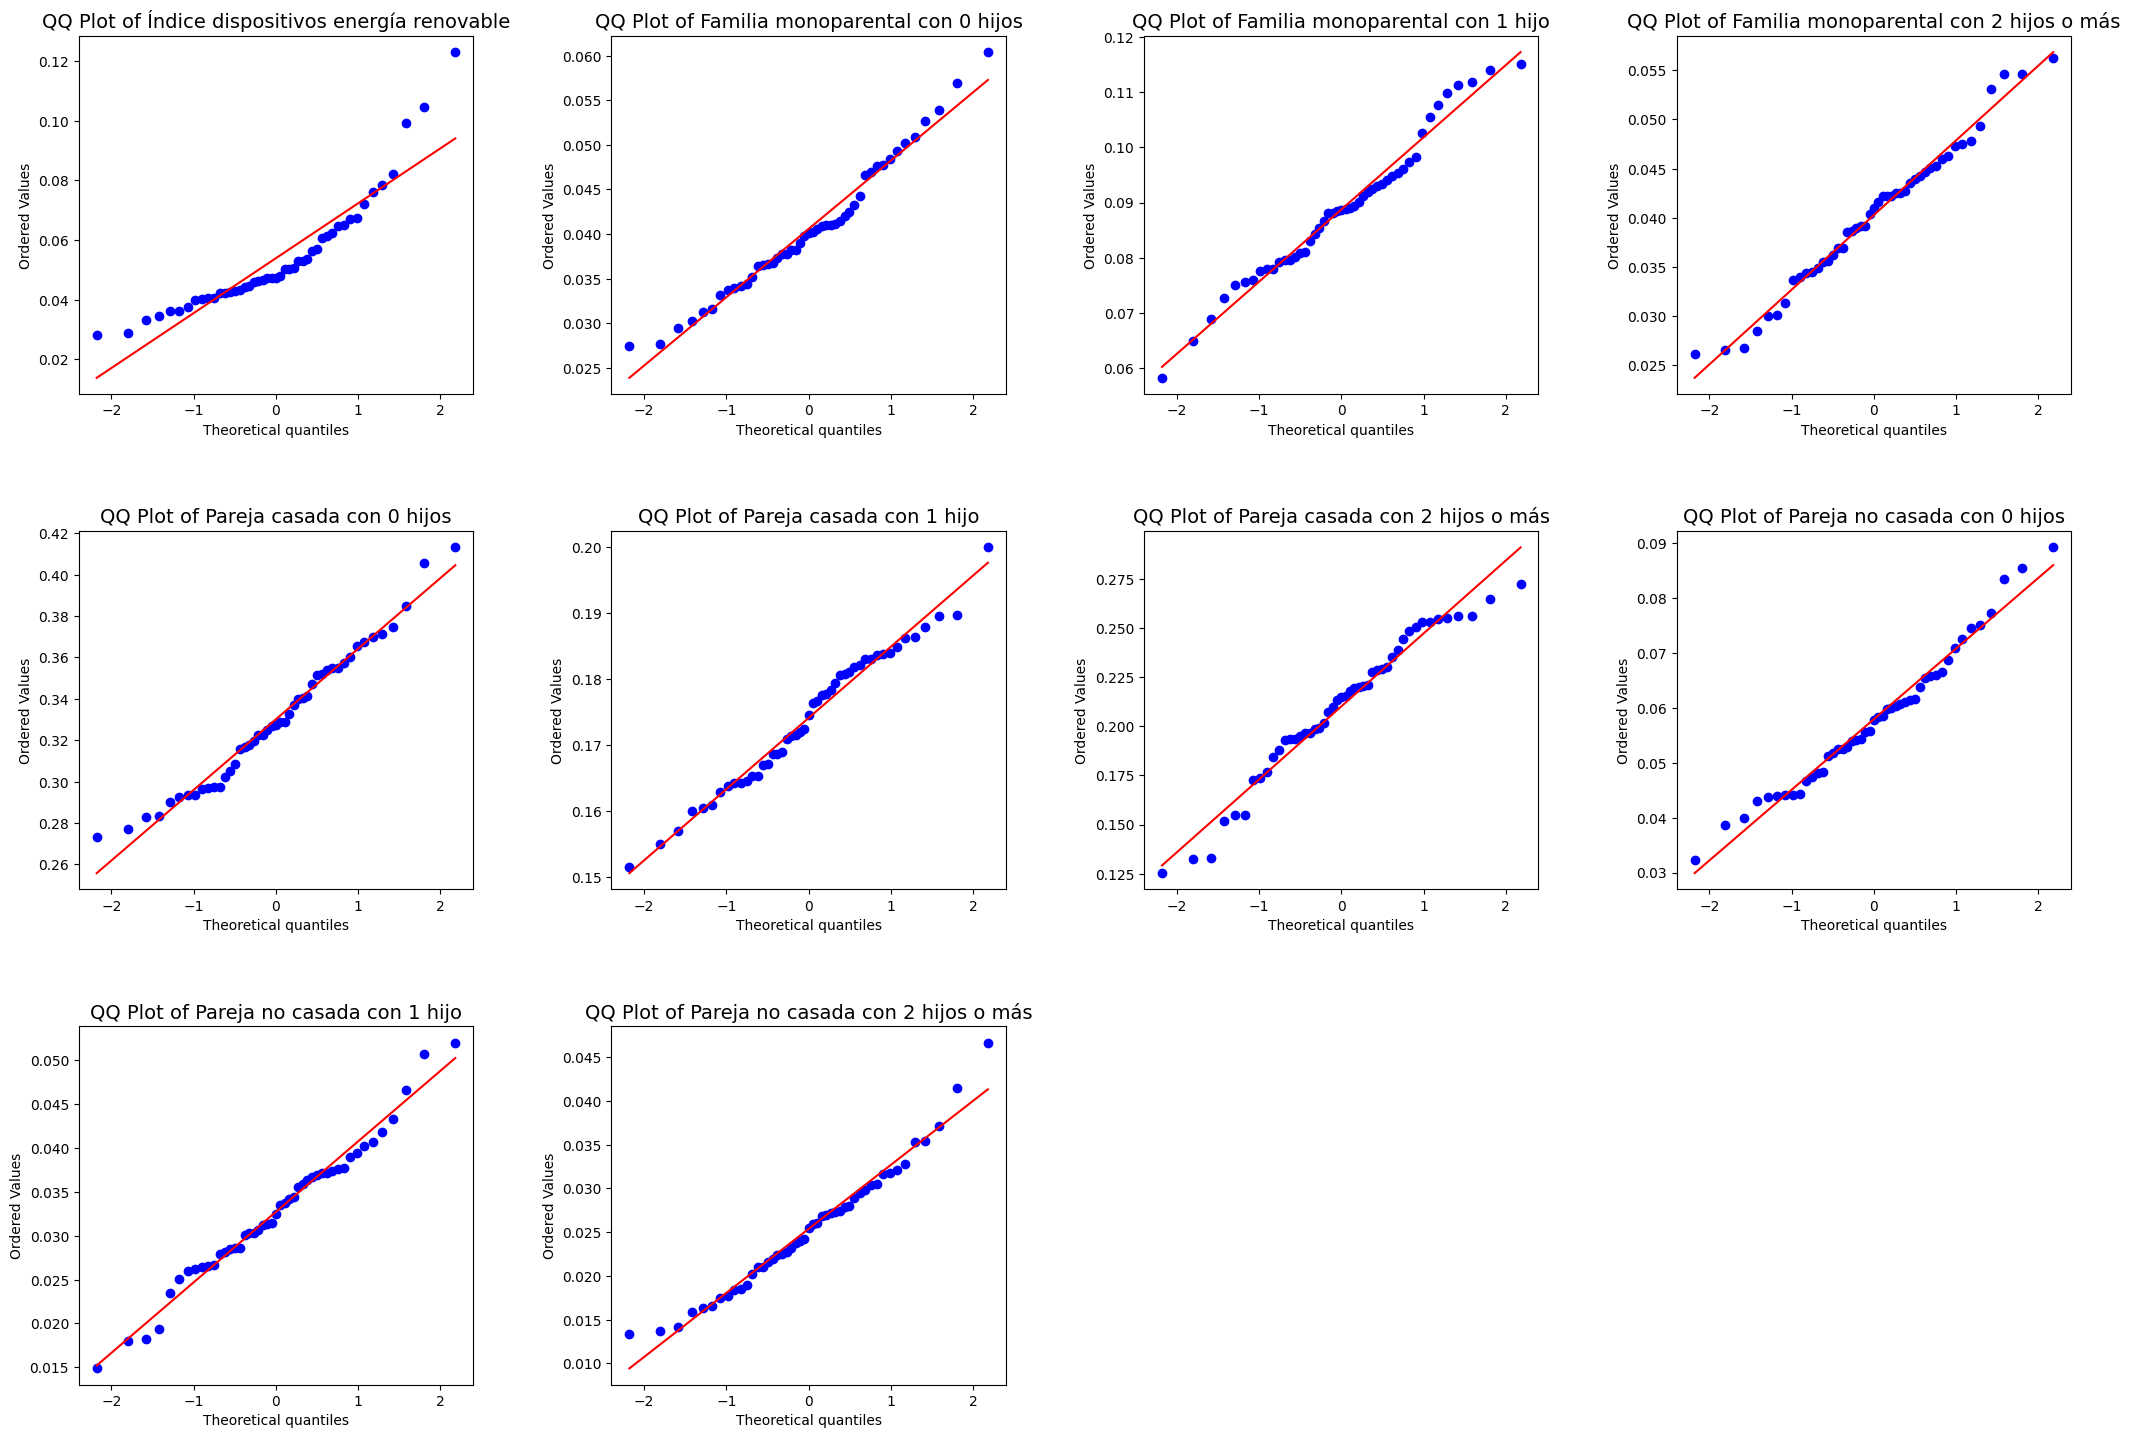

In [6]:
# Filtramos solo las columnas numéricas, excluyendo la columna 'Provincias'
numeric_columns = h3_df.select_dtypes(include=['number'])

plt.figure(figsize=(22, 30))  # Tamaño de la figura para mostrar todos los gráficos

# Bucle para crear los QQ plots para cada columna numérica
for i, column in enumerate(numeric_columns.columns, start=1):  # Usamos enumerate para el índice
    plt.subplot(6, 4, i)  # Ajustamos el tamaño de la cuadrícula para los gráficos
    stats.probplot(numeric_columns[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {column}", fontsize=14)

# Ajuste de la disposición para evitar solapamientos
plt.tight_layout(pad=5)

# Mostrar la gráfica
plt.show()



- Aunque algunas variables siguen una distribución prácticamente normal, como *Pareja no casada con 1 hijo*, la mayoría se desvía.

### **Normalización de datos**

- Para continuar con la validación de la hipótesis, se va a aplicar un modelo de K-Means a nuestro dataset. De esta manera, se intentará agrupar las provincias por características similares y así, poder hacer una mayor distinción y llegar a una conclusión final para la hipótesis tras analizar los resultados.

- Selección de variables (todas menos la primera, corresponde a los nombres de provincias)

In [7]:
# Selección de características para el clustering
features = h3_df.iloc[:, 1:]  # Todas las columnas excepto 'Provincias'

- Anteriormente, se ha concluido que las variables no siguen en su mayoría una distribución normal, por lo que, antes de hacer el modelo k-means, se normalizan las variables con MinMaxScaler, en vez de con StandardScaler (pues supone una distribución normal).

In [8]:
# Se normalizan los datos con MinMaxScaler
scaler = MinMaxScaler()
# Se ajusta y transforma el conjunto de datos
features_scaled = scaler.fit_transform(features)

### **Análisis de componentes principales**
- Como el dataset tiene bastantes columnas, se va a aplicar PCA para preprocesar los datos antes del clustering y comprobar si con una menor dimensionalidad se puede llegar a la validación de la hipótesis.

In [9]:
pca = PCA(n_components=2) # 2 componentes principales
X_pca = pca.fit_transform(features_scaled)

In [10]:
print(pca.explained_variance_ratio_) 

[0.41457129 0.19952801]


- A continuación, se visualizan las relaciones entre provincias por sus datos preprocesados en espacio bidimensional (por el PCA).

Text(0.5, 1.0, 'Representación 2D de los datos (por provincias)')

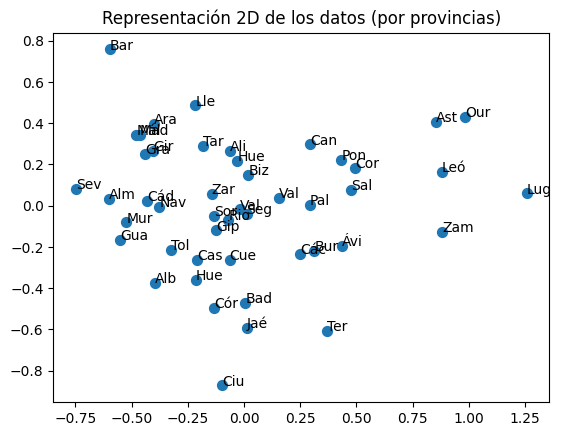

In [11]:
fig, ax = plt.subplots()
# Provincias
h3_df_provinces = h3_df['Provincias']
ax.scatter(X_pca[:,0], X_pca[:,1] ,s=50)

# anotación 
for i in range(0,len(X_pca)):
    # annotate with name of province
    ax.annotate(h3_df_provinces[i][0:3], (X_pca[i,0], X_pca[i,1]))
ax.set_title('Representación 2D de los datos (por provincias)')

### **Modelo K-Means**
- Antes de realizar el modelo de clustering, se aplica Elbow method (método del codo) para ver si hay un número de clusters más óptimo.

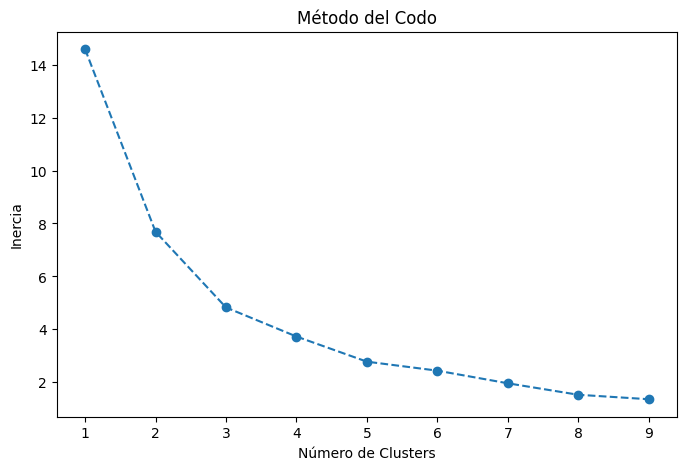

In [12]:
# Método del codo para elegir el número de clusters
inertia = []

k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # features_scaled
    kmeans.fit(X_pca) 
    inertia.append(kmeans.inertia_) # Suma de las distancias al cuadrado de las muestras al centro del cluster más cercano



# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()


- En el gráfico anterior, el codo se encuentra en k=3, por lo que se elige este valor para el número de clusters.

In [13]:
# Aplicar el algoritmo K-Means
n_clusters = 3  # Número de clusters (puedes ajustar este valor)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Se ajusta el modelo
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

- Se crea columna 'Cluster' para guardarle a cada provincia el cluster al que pertenece.

In [14]:
# Añadir los clusters al DataFrame original
h3_df["Cluster"] = kmeans.labels_

In [15]:
h3_df.head()

,Provincias,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más,Cluster
0,Albacete,0.043141,0.033132,0.072565,0.044648,0.304961,0.176333,0.256043,0.051729,0.028501,0.032087,0
1,Alicante/Alacant,0.040361,0.041038,0.094143,0.045081,0.329020,0.160075,0.207443,0.065322,0.037659,0.020219,2
2,Almería,0.067138,0.030276,0.090071,0.042470,0.290029,0.161023,0.254404,0.059751,0.040286,0.031691,2
3,Araba/Álava,0.104454,0.033775,0.097398,0.045232,0.328722,0.157060,0.201585,0.072500,0.037726,0.026002,2
4,Asturias,0.050314,0.056932,0.115216,0.035539,0.365556,0.187972,0.132908,0.066571,0.023420,0.015886,1


- Se crea un scatter plot en el que se muestran los resultados del clustering, para visualizar los diferentes grupos.

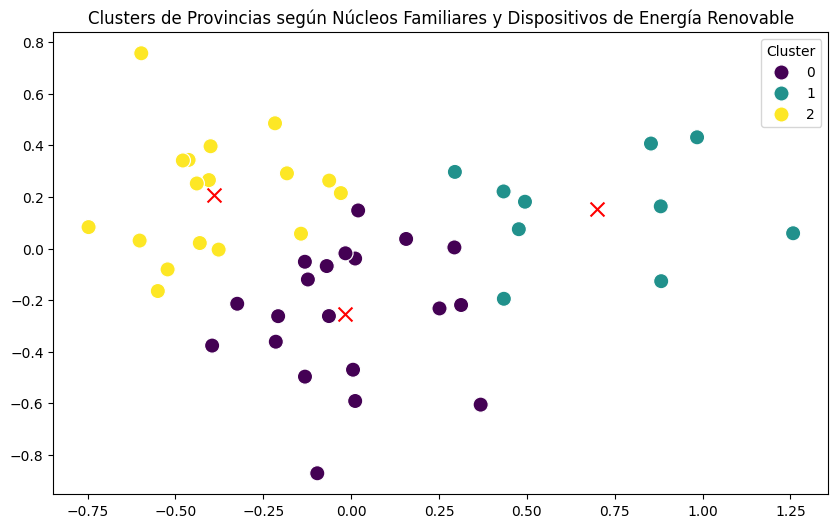

In [16]:
# Crear un scatter plot de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=h3_df["Cluster"],
    palette="viridis",
    s=120
)
# plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red',s=100, marker='x')
plt.title("Clusters de Provincias según Núcleos Familiares y Dispositivos de Energía Renovable")
plt.legend(title="Cluster")
plt.show()

- Se calcula el coeficiente de Silueta, para evaluar la calidad del clustering obtenido con K-means.

In [17]:
from sklearn.metrics import silhouette_score

# Calcular el silhouette coefficient
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f"El coeficiente de silueta promedio es: {silhouette_avg:.3f}")


El coeficiente de silueta promedio es: 0.366


- Un coeficiente de silueta de 0.366 es débil. No obstante, se analizarán los clusters resultantes para ver si son de calidad.

- Visualización de provincias por cluster.

In [18]:
n_clusters

3

In [19]:
# Ver las provincias en cada cluster
for cluster_id in range(n_clusters):
    print(f"Provincias en el Cluster {cluster_id}:")
    print(h3_df[h3_df["Cluster"] == cluster_id]["Provincias"].values)
    print()

Provincias en el Cluster 0:
['Albacete' 'Badajoz' 'Bizkaia' 'Burgos' 'Castellón/Castelló'
 'Ciudad Real' 'Cuenca' 'Cáceres' 'Córdoba' 'Gipuzkoa' 'Huelva' 'Jaén'
 'Palencia' 'Rioja, La' 'Segovia' 'Soria' 'Teruel' 'Toledo'
 'Valencia/València' 'Valladolid']

Provincias en el Cluster 1:
['Asturias' 'Cantabria' 'Coruña, A' 'León' 'Lugo' 'Ourense' 'Pontevedra'
 'Salamanca' 'Zamora' 'Ávila']

Provincias en el Cluster 2:
['Alicante/Alacant' 'Almería' 'Araba/Álava' 'Barcelona' 'Cádiz' 'Girona'
 'Granada' 'Guadalajara' 'Huesca' 'Lleida' 'Madrid' 'Murcia' 'Málaga'
 'Navarra' 'Sevilla' 'Tarragona' 'Zaragoza']



#### **Análisis de clusters obtenidos**

- Se identifica cada provincia por el cluster al  que pertence.

In [20]:
cluster_0 = h3_df[h3_df["Cluster"] == 0].copy()
cluster_0.iloc[:, 1:] *= 100

cluster_1 = h3_df[h3_df["Cluster"] == 1].copy()
cluster_1.iloc[:, 1:] *= 100

cluster_2 = h3_df[h3_df["Cluster"] == 2].copy()
cluster_2.iloc[:, 1:] *= 100


##### **Análisis resultados por estadísticas**

In [21]:
cluster_0.describe()

,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más,Cluster
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,5.044372,3.808257,7.950159,3.864579,33.592612,17.568870,22.541727,5.144486,2.997876,2.531433,0.0
std,1.471422,0.583467,0.949656,0.612316,2.155775,0.854513,2.502223,0.817092,0.777278,0.768215,0.0
min,3.617684,2.747323,5.813623,2.653539,29.756295,15.511032,18.446618,3.236634,1.486636,1.418418,0.0
25%,4.275700,3.405561,7.535948,3.444260,31.900941,16.888871,21.077563,4.429528,2.759535,2.041281,0.0
50%,4.601471,3.863624,7.957107,3.885672,33.843240,17.723843,22.424771,5.246926,3.085433,2.459987,0.0
75%,5.121328,4.162390,8.457138,4.220479,35.252476,18.210973,25.112715,5.637583,3.436787,2.905727,0.0
max,9.921941,4.838728,9.822397,4.930574,36.992485,18.974221,26.469106,6.370578,4.334959,4.663033,0.0


In [22]:
cluster_1.describe()

,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más,Cluster
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,3.786562,5.166291,10.245661,3.460294,36.953755,18.226322,15.685221,5.211926,3.100324,1.950205,100.0
std,0.732665,0.437006,1.073811,0.655766,2.680856,0.979273,2.227858,0.938667,0.721671,0.507222,0.0
min,2.820683,4.690031,8.860531,2.617160,32.757820,16.530774,12.525446,3.858230,2.342001,1.335040,100.0
25%,3.355835,4.813608,9.254427,2.891233,35.557406,17.811035,13.760197,4.477567,2.607395,1.599869,100.0
50%,3.693315,5.055794,10.524902,3.556243,36.841054,18.261721,15.477929,5.049993,2.914321,1.834138,100.0
75%,4.168404,5.358511,11.143826,3.824045,38.243496,18.759023,17.343473,6.018449,3.345765,2.282120,100.0
max,5.031368,6.037995,11.521576,4.427797,41.312078,19.995662,19.328611,6.657121,4.665317,2.720152,100.0


In [23]:
cluster_2.describe()

,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más,Cluster
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,6.736818,3.700636,9.150774,4.554822,30.019396,16.755320,22.337415,6.893088,3.700163,2.888385,200.0
std,2.068198,0.377032,0.861396,0.610384,1.778969,0.953600,2.450097,1.133428,0.689504,0.553853,0.0
min,4.036060,2.949612,7.797475,3.401050,27.321225,15.160749,19.351052,4.809723,2.642174,2.021935,200.0
25%,5.622456,3.418611,8.805291,4.246996,29.002857,16.102253,20.158483,5.975122,3.439409,2.425196,200.0
50%,6.465061,3.673203,9.119983,4.508104,29.628081,16.431035,21.812024,6.859507,3.689993,2.791519,200.0
75%,7.193461,4.028857,9.545483,4.726109,31.558518,17.154681,24.466053,7.497288,3.938286,3.179859,200.0
max,12.301337,4.243966,11.135271,5.622840,32.901993,18.628913,27.251044,8.916001,5.201401,4.148982,200.0


- **Índice dispositivos energía renovable**: El cluster 2 agrupa provincias teniendo una media de 6,74% de dispositivos de energía renovable, mientras que el cluster 1 y el cluster 0 3,79% y 5,04% respectivamente.

- **Familia monoparental con 0 hijos**: El cluster 2 tiene una media de 3,7% de familia monoparentales con 0 hijos, mientras que el cluster 1 y 0 tienen 5,17% y 3,8%, respectivamente.

- **Familia monoparental con 2 hijos o más**: El cluster 2 presenta una media de 4.55% de familias monoparentales con 2 hijos o más. El cluster 1 una media de 3,46% y el cluster 0 tiene un 3.86%.

- **Pareja casada con 2 hijos o más**: El cluster 2 agrupa provincias teniendo una media de 22,34% en familias que se componen de pareja casada con 2 o más hijos. El cluster 1 toma el valor de 15,69% y el cluster 0 un 22,54%

- **Pareja no casada con 2 hijos o más**: La media de familias compuesta por pareja no casada con 2 hijos o más para el cluster 2 es de 2.89%, mientras que para el cluster 1 y 0 es de 1,95% y 2,53%, respectivamente.

    - **Conclusiones**:
        - El cluster 2 presenta mayoritariamente provincias con un porcentaje más elevado en cuanto a núcleo familiares más grandes, además de presentar la media más alta en cuanto a índice de dispositivos de energía renovable.

        - En cuanto al claser 0, queda claro que presenta provincias que le hacen tener el menor índice de dispositivos de energía renovable, además de tener la media más alta en cuanto a núcleos familiares más pequeños.

        - Al cluster 2 le sigue el cluster 0, que presenta valores medios entre el cluster 1 y el cluster 2.

- Para finalizar las conclusiones, se visualizarán boxplots para mostrar de forma más concisa cómo se distribuyen las características en los clusters.

    

##### **Análisis resultados por boxplot**

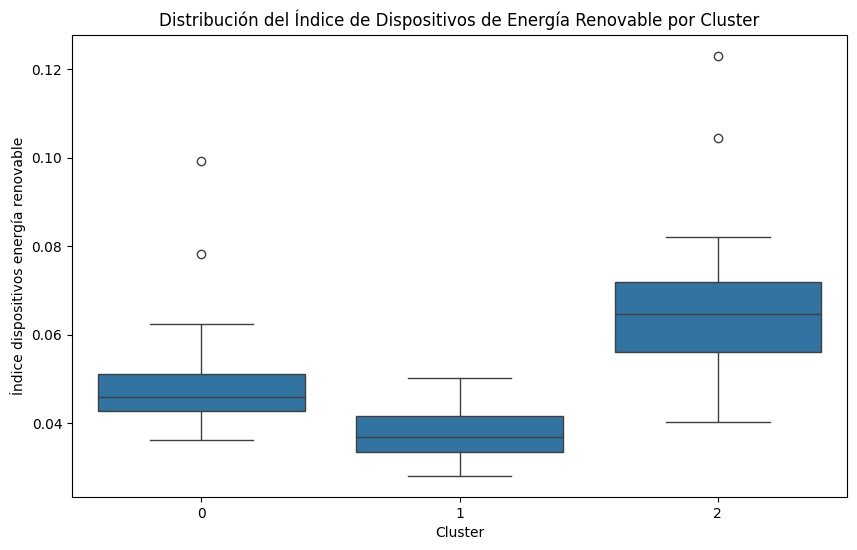

In [24]:
# Gráfico de barras comparando el índice de energía renovable entre clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Índice dispositivos energía renovable", data=h3_df)
plt.title("Distribución del Índice de Dispositivos de Energía Renovable por Cluster")
plt.show()


In [25]:
# Mostrar provincias del cluster 2 en orden descendente en cuanto a dispositivos de energía renovable. Mostrar sólo columna Provincias e Índice dispositivos energía renovable
cluster_2.sort_values("Índice dispositivos energía renovable", ascending=False)[["Provincias", "Índice dispositivos energía renovable"]].head(5)

,Provincias,Índice dispositivos energía renovable
37,Sevilla,12.301337
3,Araba/Álava,10.445424
15,Cádiz,8.209187
27,Madrid,7.618575
20,Guadalajara,7.193461


In [26]:
# Mostrar provincias del cluster 2 en orden descendente en cuanto a dispositivos de energía renovable. Mostrar sólo columna Provincias e Índice dispositivos energía renovable
cluster_0.sort_values("Índice dispositivos energía renovable", ascending=False)[["Provincias", "Índice dispositivos energía renovable"]].head(5)

,Provincias,Índice dispositivos energía renovable
38,Soria,9.921941
21,Huelva,7.828205
16,Córdoba,6.240188
17,Gipuzkoa,5.352707
40,Teruel,5.284368


- En el boxplot, queda claro que las provincias con mayor índice de dispositivos de energía renovable se acumulan en el cluster 2, seguido del cluster 0. No obstante, la mediana del cluster 2 toma un valor más alto que el bigote que indica valor máximo del cluster 0.

- Los outliers del cluster 2 corresponden a Sevilla y Álava, siendo las provincias de España con más porcentaje de dispositivos de energía renovable.

- En cuanto a los outliers del cluster 0, nos encontramos con Soria y Huelva. Más adelante, se intentará justificar que estas provincias no se encuentren en el cluster 2. Pues queda por analizar las provincias según el tipo de núcleo familiar.

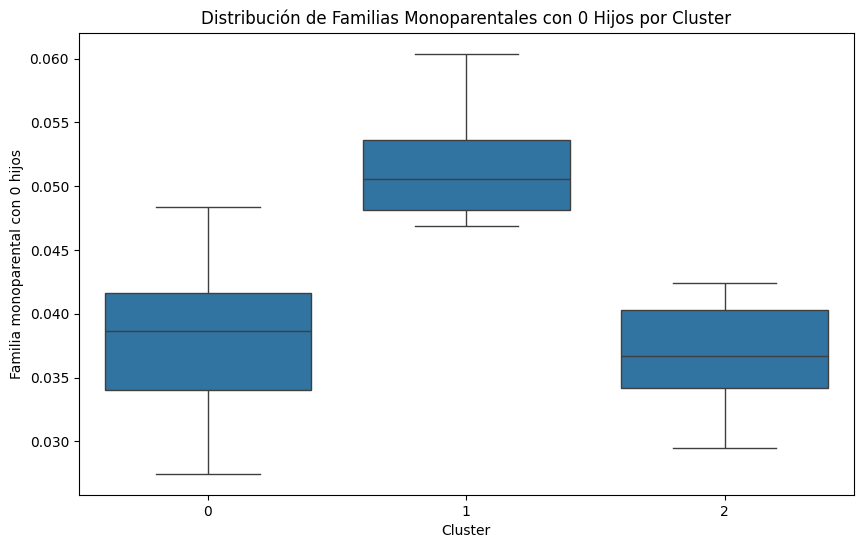

In [27]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Familia monoparental con 0 hijos", data=h3_df)
plt.title("Distribución de Familias Monoparentales con 0 Hijos por Cluster")
plt.show()


In [28]:
# Mostrar provincias del cluster 0 en orden descendente en cuanto a Familia monoparental con 0 hijos. 
cluster_0.sort_values("Familia monoparental con 0 hijos", ascending=False)[["Provincias", "Familia monoparental con 0 hijos"]].head(5)

,Provincias,Familia monoparental con 0 hijos
36,Segovia,4.838728
32,Palencia,4.660453
38,Soria,4.427136
8,Burgos,4.329656
17,Gipuzkoa,4.207624


In [29]:
# Mostrar provincias del cluster 0 en orden descendente en cuanto a Familia monoparental con 0 hijos. 
cluster_2.sort_values("Familia monoparental con 0 hijos", ascending=False)[["Provincias", "Familia monoparental con 0 hijos"]].head(5)

,Provincias,Familia monoparental con 0 hijos
22,Huesca,4.243966
29,Málaga,4.106085
1,Alicante/Alacant,4.103805
25,Lleida,4.090353
18,Girona,4.028857


- Soria tiene un porcentaje de familias monoparentales con 0 hijos más alto que el de Huesca (provincia del cluster 2 con más porcentaje de familia monoparental con 0 hijos). Esto justificaría que estuviese en el cluster 1. Pero, ¿por qué Huelva está en este cluster?

In [30]:
cluster_0.sort_values("Pareja casada con 1 hijo" and "Familia monoparental con 1 hijo", ascending=False)[["Provincias", "Pareja casada con 1 hijo", "Familia monoparental con 1 hijo"]].head(5)

,Provincias,Pareja casada con 1 hijo,Familia monoparental con 1 hijo
42,Valencia/València,18.178770,9.822397
7,Bizkaia,17.197987,9.478556
21,Huelva,18.400026,8.931152
34,"Rioja, La",17.245578,8.801350
8,Burgos,17.830691,8.528400


- Huelva es un provincia que mantiene un alto porcentaje dentro del cluster 0 de familias compuestas por pocos miembros. Esto podría explicar que haya sido agrupado en el cluster 0 en vez de en el 2.

In [31]:
# Mostrar provincias del cluster 0 en orden descendente en cuanto a Familia monoparental con 0 hijos. 
cluster_1.sort_values("Familia monoparental con 0 hijos", ascending=False)[["Provincias", "Familia monoparental con 0 hijos"]].head(10)

,Provincias,Familia monoparental con 0 hijos
26,Lugo,6.037995
4,Asturias,5.693179
31,Ourense,5.388622
24,León,5.268179
35,Salamanca,5.089300
12,"Coruña, A",5.022288
9,Cantabria,4.932067
33,Pontevedra,4.774122
44,Zamora,4.767130
46,Ávila,4.690031


- Con el cluster 1, que acumula provincias con el mayor porcentaje de familias monoparentales con 0 hijos, queda claro que las provincias de la parte noroeste de España predominan para esta variable.

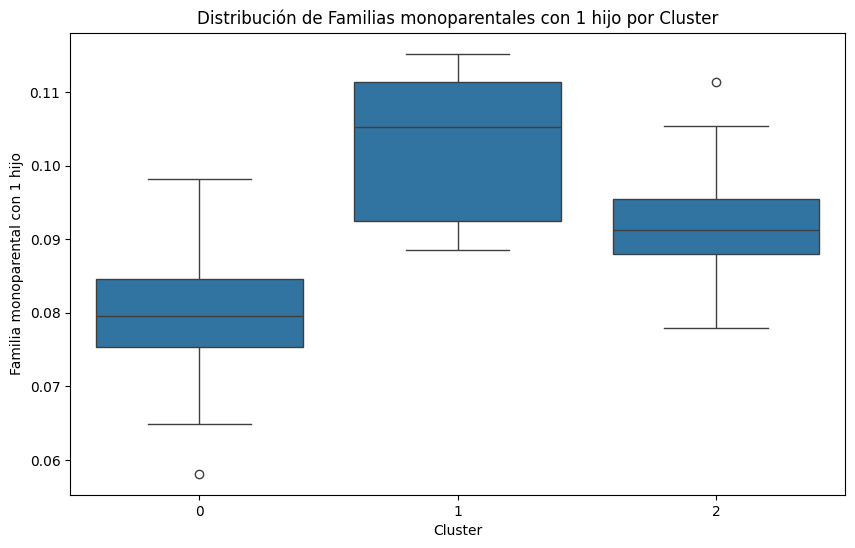

In [32]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Familia monoparental con 1 hijo", data=h3_df)
plt.title("Distribución de Familias monoparentales con 1 hijo por Cluster")
plt.show()

In [33]:
# Mostrar provincias del cluster 0 en orden descendente en cuanto a Familia monoparental con 1 hijo. 
cluster_1.sort_values("Familia monoparental con 1 hijo", ascending=False)[["Provincias", "Familia monoparental con 1 hijo"]].head(5)

,Provincias,Familia monoparental con 1 hijo
4,Asturias,11.521576
24,León,11.404458
31,Ourense,11.192503
26,Lugo,10.997795
9,Cantabria,10.779050


- El cluster 1 vuelve a predominar, ahora en familias monoparentes con 1 hijo. Seguido del cluster 2 y por último el cluster 0.
    - El cluster 2 presenta como outlier Lleida (11.14%), mientras que el cluster 0 presenta a Ciudad Real con un 5.81%.

In [34]:
# Mostrar provincias del cluster 0 en orden descendente en cuanto a Familia monoparental con 1 hijo. 
cluster_2.sort_values("Familia monoparental con 1 hijo", ascending=False)[["Provincias", "Familia monoparental con 1 hijo"]].head(5)

,Provincias,Familia monoparental con 1 hijo
25,Lleida,11.135271
6,Barcelona,10.545482
3,Araba/Álava,9.739821
19,Granada,9.602148
15,Cádiz,9.545483


In [35]:
# Mostrar provincias del cluster 0 en orden descendente en cuanto a Familia monoparental con 1 hijo. 
cluster_0.sort_values("Familia monoparental con 1 hijo", ascending=True)[["Provincias", "Familia monoparental con 1 hijo"]].head(5)

,Provincias,Familia monoparental con 1 hijo
11,Ciudad Real,5.813623
13,Cuenca,6.485841
10,Castellón/Castelló,6.888464
0,Albacete,7.256527
38,Soria,7.495831


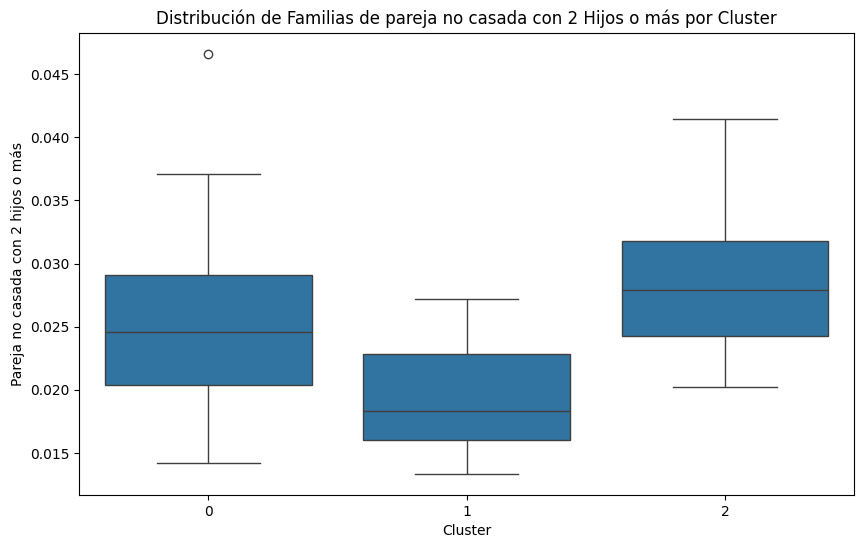

In [36]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Pareja no casada con 2 hijos o más", data=h3_df)
plt.title("Distribución de Familias de pareja no casada con 2 Hijos o más por Cluster")
plt.show()


- En estos boxplots, los datos están más dispersos. Aún así, se aprecia que en el cluster 2 las provincias tienen una mayor proporción de familias de pareja no casada con 2 hijos o más, seguido del cluster 0, y finalmente el cluster 1

In [37]:
# Mostrar provincias del cluster 0 en orden descendente en cuanto a Pareja  no casada con 2 hijos o más. 
cluster_0.sort_values("Pareja no casada con 2 hijos o más", ascending=False)[["Provincias", "Pareja no casada con 2 hijos o más"]].head(5)

,Provincias,Pareja no casada con 2 hijos o más
38,Soria,4.663033
21,Huelva,3.712599
0,Albacete,3.208749
17,Gipuzkoa,3.054239
40,Teruel,2.948377


- En el cluster 0 hay un outlier en Soria respecto a esta variable.

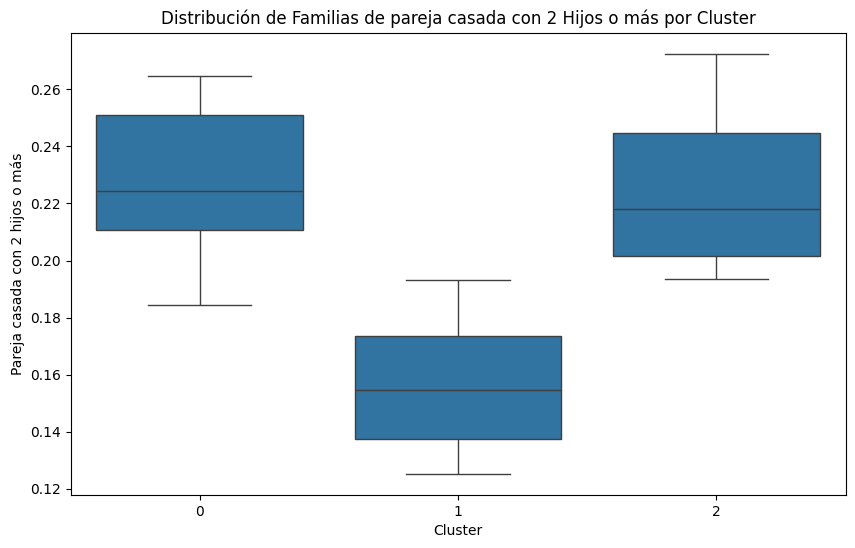

In [38]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Pareja casada con 2 hijos o más", data=h3_df)
plt.title("Distribución de Familias de pareja casada con 2 Hijos o más por Cluster")
plt.show()


- En cuanto a parejas casadas con 2 hijos o más, también los datos están dispersos. No obstante, se aprecia que tanto en el cluster 2, como en el cluster 0, hay un claro mayor porcentaje de este núcleo familiar.
    - Aunque la mediana es menor en el cluster 2 respecto al cluster 0, los bigotes indican que la provincia de menor porcentaje tiene más porcentje que la menor del cluster 0. Al igual que la provincia de mayor porcentaje del cluster 2 es también mayor que la del cluster 0.

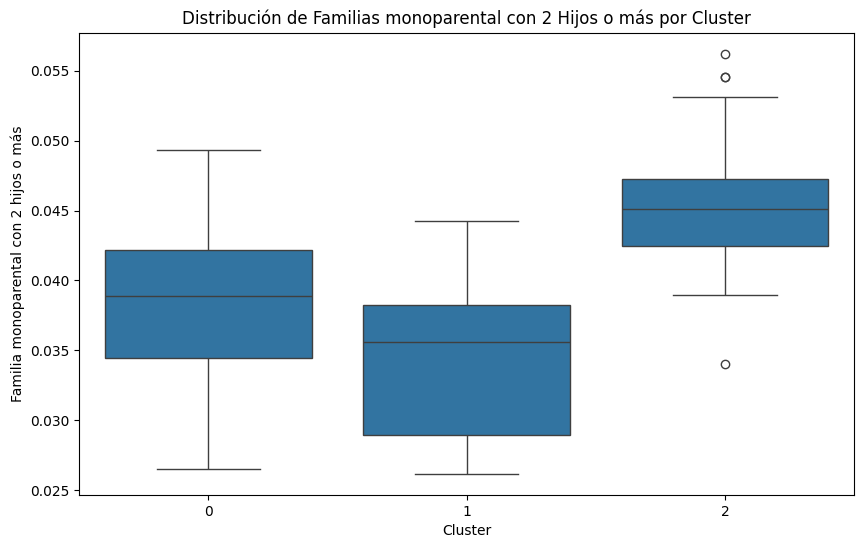

In [39]:
# Gráfico de barras comparando las proporciones de familias en diferentes tipos de núcleos familiares
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="Familia monoparental con 2 hijos o más", data=h3_df)
plt.title("Distribución de Familias monoparental con 2 Hijos o más por Cluster")
plt.show()


- En relacion a familias monoparentales con 2 hijos o más, para el cluster 0 y 1, los datos están más dispersos. Sin embargo, en el cluster 2, se observa claramente que las provincias tienen un mayor porcentaje de este tipo de núcleo familiar.
    - En el cluster 2 hay outliers:
        - Málaga con 5.62% (por encima).
        - Barcelona con 5.49% (por encima).
        - Huesca con 3,40% (por debajo).


In [40]:
# Mostrar provincias del cluster 0 en orden descendente en cuanto a Familia monoparental con 2 hijos o más. 
cluster_2.sort_values("Familia monoparental con 2 hijos o más", ascending=True)[["Provincias", "Familia monoparental con 2 hijos o más"]].head(5)

,Provincias,Familia monoparental con 2 hijos o más
22,Huesca,3.401050
18,Girona,3.896196
45,Zaragoza,3.916282
20,Guadalajara,4.218262
2,Almería,4.246996


##### **Conclusión y validación de la hipótesis**

- Por un lado, **se ha estudiado que hay una correlación positiva entre los núcleos familiares compuestos por más miembros y el índice de dispostivos de energía renovable. Mientras que hay una correlación negativa con aquellos núcleos de menos miembros.**

- Además, tras aplicar el modelo de clustering K-means, se han obtenido tres diferentes grupos de provincias. Estos clusters se han analizado mediante la función describe() y posteriormente por boxplots.
     - Los resultados obtenidos para cada clúster indican que **en el grupo 2 se acumulan aquellas provincias que presentan un mayor índice de dispositivos de energía renovable, además de presentar mayores porcentajes en cuanto a núcleos familiares de más miembros. Este clúster, es seguido por el 0, y, por último, el 1. El grupo uno presenta, de forma contraria, un menor porcentaje de dispositivos de energía renovable y un mayor porcentaje de familias de menos miembros**. 

- Tras esta conclusión y el análisis anteriormente realizado, se concluye que la hipótesis **"En un núcleo familiar compuesto por más miembros es más probable que se invierta en energía renovable"** es válida.

✅Hipótesis validada.

- Mapa de provincias de España, representación de los clusters obtenidos.

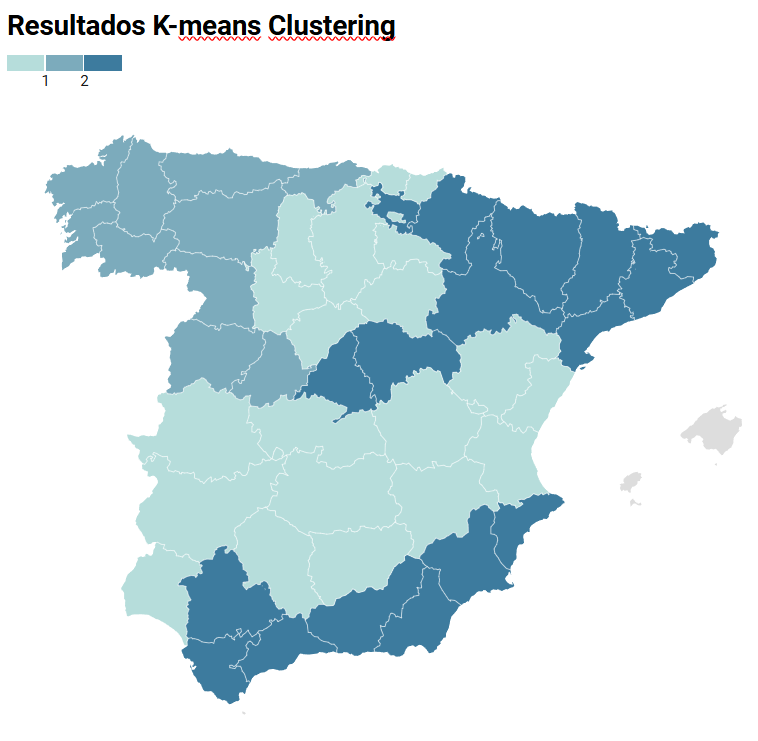

In [41]:

# Dataframe con Provincia y cluster
provincias_por_cluster = h3_df[["Provincias", "Cluster"]] 
provincias_por_cluster.index = provincias_por_cluster["Provincias"]  
provincias_por_cluster.drop(columns=["Provincias"], inplace=True)
provincias_por_cluster.to_csv('provincias_cluster_h3.csv', sep=',')

C:\Users\SergioHF\AppData\Local\Temp\ipykernel_12568\926316374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincias_por_cluster.drop(columns=["Provincias"], inplace=True)
